## KNN-- KNearestNeighbors

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("C:\\Users\\Admin\\Downloads\\iris.csv")

In [3]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
data.drop('Id',axis=1,inplace=True)

In [5]:
data.shape

(150, 5)

In [6]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
x=data.iloc[:,:-1].values
y=data.iloc[:,4].values

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=2)

In [11]:
print(x_train.shape,x_test.shape,y_train.shape, y_test.shape)

(120, 4) (30, 4) (120,) (30,)


In [12]:
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
Scaler.fit(x_train)
x_train=Scaler.transform(x_train)
x_test=Scaler.transform(x_test)

In [13]:
from sklearn.neighbors import  KNeighborsClassifier
Classifier= KNeighborsClassifier(n_neighbors=5)
Classifier.fit(x_train,y_train)

KNeighborsClassifier()

In [14]:
y_pred=Classifier.predict(x_test)

In [15]:
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score
print("Confusion Matrix :\n" ,confusion_matrix(y_test , y_pred)),"\n"
print("Classification_Report :\n" , classification_report(y_test , y_pred))

Confusion Matrix :
 [[14  0  0]
 [ 0  7  1]
 [ 0  0  8]]
Classification_Report :
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      0.88      0.93         8
 Iris-virginica       0.89      1.00      0.94         8

       accuracy                           0.97        30
      macro avg       0.96      0.96      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [16]:
# calculating accuracy for different values of k's
ks = 25
mean_acc =  np.zeros(ks-1)
for n in range(1,ks):
    model_knn = KNeighborsClassifier(n_neighbors = n).fit(x_train , y_train)   #train model and predict
    y_hat = model_knn.predict(x_test)
    mean_acc[n-1] = accuracy_score(y_test , y_hat)
    print('accuracy at k=',n,'is',mean_acc[n-1])                                  

accuracy at k= 1 is 1.0
accuracy at k= 2 is 1.0
accuracy at k= 3 is 1.0
accuracy at k= 4 is 1.0
accuracy at k= 5 is 0.9666666666666667
accuracy at k= 6 is 1.0
accuracy at k= 7 is 1.0
accuracy at k= 8 is 1.0
accuracy at k= 9 is 1.0
accuracy at k= 10 is 1.0
accuracy at k= 11 is 1.0
accuracy at k= 12 is 1.0
accuracy at k= 13 is 0.9666666666666667
accuracy at k= 14 is 1.0
accuracy at k= 15 is 0.9666666666666667
accuracy at k= 16 is 1.0
accuracy at k= 17 is 0.9666666666666667
accuracy at k= 18 is 0.9666666666666667
accuracy at k= 19 is 0.9666666666666667
accuracy at k= 20 is 0.9666666666666667
accuracy at k= 21 is 0.9666666666666667
accuracy at k= 22 is 0.9666666666666667
accuracy at k= 23 is 0.9666666666666667
accuracy at k= 24 is 0.9666666666666667


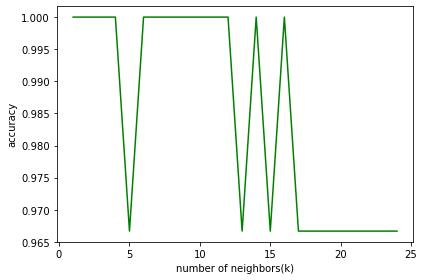

In [17]:
plt.plot(range(1,ks),mean_acc,'g')
plt.ylabel('accuracy')
plt.xlabel('number of neighbors(k)')
plt.tight_layout()
plt.show()

In [18]:
error=[]
for i in range(1,40): #calculating error for k values between 1 and 40
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i=knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))
error

[0.0,
 0.0,
 0.0,
 0.0,
 0.03333333333333333,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.03333333333333333,
 0.0,
 0.03333333333333333,
 0.0,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.06666666666666667,
 0.1,
 0.1]

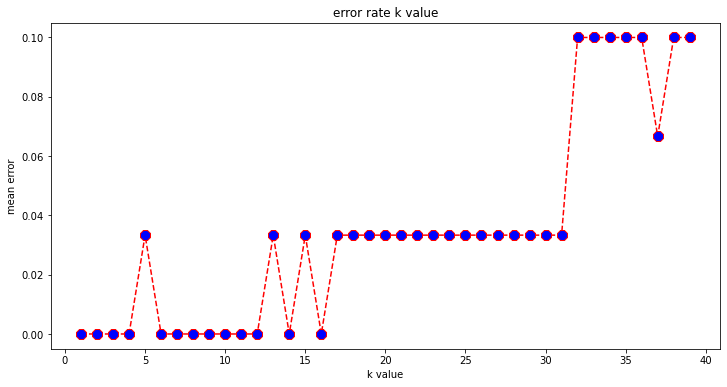

In [19]:
plt.figure(figsize=(12,6))
plt.plot(range(1,40), error, color='red', linestyle='dashed', marker='8',markerfacecolor='blue',markersize=10)
plt.title('error rate k value')
plt.xlabel('k value')
plt.ylabel('mean error');